Regressão
=========

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Nesta aula vamos aprender sobre:
 1. **Seleção/organização de features (variáveis de entrada)**;
 1. **Particionamento de dados (Conjunto de treinamento e de validação)**;
 2. **Regressão usando Regressão Linear Multipla e Random Forest**;

Carregando os dados do exercício de hoje
===================================

Os dados que utilizaremos na aula de hoje estão salvos no arquivo `dados_tratados.csv`. <br></br>

**Exercício**: Carregue-os em memória em uma variável chamada `dados`, na célula abaixo, utilizando a biblioteca ``pandas``.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    rc={"figure.figsize": (14, 6)},
    style="whitegrid",
    font_scale=1.2,
)

dados = pd.read_csv("dados_tratados.csv")
dados.head()

,localidade,tipo,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,Localidade 4,Tipo 1,0.081382,0.727021,3603.941384,2002.686030,1124.043113,0,0,4,123.0,731600
1,Localidade 4,Tipo 2,0.367980,0.145812,2185.209139,683.811862,2462.825432,0,0,13,143.0,318600
2,Localidade 3,Tipo 2,0.332654,0.432904,1025.698339,957.451552,1049.112117,0,0,12,150.0,1000800
3,Localidade 4,Tipo 1,0.159663,0.884596,NaN,3723.067390,1296.121182,0,0,8,160.0,678200
4,Localidade 3,Tipo 1,0.156154,0.836320,3925.306331,705.807343,4178.062758,0,0,12,134.0,1215100


1 - Seleção/organização de features (variáveis de entrada)
===============================================

São poucos os algorítmos de **Machine Learning** que conseguem lidar com variáveis categóricas sem um devido pré-processamento. Por esse motivo, é importante codificá-las de forma adequada, para que seja possível comparar resultados de técnicas distintas, mesmo que uma delas não trate valores categóricos internamente.

Os métodos mais utilizados para codificação de variáveis categóricas são:
 - **One hot encoding**: Criar uma coluna para cada possível valor de saída de sua variável categórica. Quando a sua amostra pertence à **classe** representada por uma determinada coluna, atribuimos o valor 1 (essa amostra percente a esta classe), caso contrário, a célula desta coluna recebe o valor 0 (essa amostra não pertence a esta classe);

 - **Variáveis Dummy**: Similar a codificação **One hot encoding**, porém, omite uma das possíveis colunas de saída. Por exemplo, se nossa variável categórica "*Tipo*" pode assumir os valores A, B e C, criamos apenas duas colunas, denominadas *Tipo_A* e *Tipo_B*. Note que, na ausência das duas (valor = 0), sabemos que estamos nos referindo a uma amostra do *Tipo_C*.

 
**Exercício**: Codifique as variáveis categóricas (**localidade** e **tipo**) do conjunto de dados, e salve o
resultado em um variável chamada ``dataset``, contendo apenas as **features** (variáveis de entrada) e o **target** (valor do imóvel, variável **preco**) que utilizaremos na análise de regressão.

**Dicas**:
 - Ao menos que você tenha projetado uma camada de **Imputação de Dados** para o seu problema, lembre-se de remover dados nulos do seu conjunto antes de organizar as suas **features**;
 - Procure pela documentação da função ``get_dummies`` da biblioteca ``pandas``;

In [16]:
dataset = pd.get_dummies(dados.dropna())
dataset.head()

,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco,localidade_Localidade 1,localidade_Localidade 2,localidade_Localidade 3,localidade_Localidade 4,tipo_Tipo 1,tipo_Tipo 2
0,0.081382,0.727021,3603.941384,2002.686030,1124.043113,0,0,4,123.0,731600,0,0,0,1,1,0
1,0.367980,0.145812,2185.209139,683.811862,2462.825432,0,0,13,143.0,318600,0,0,0,1,0,1
2,0.332654,0.432904,1025.698339,957.451552,1049.112117,0,0,12,150.0,1000800,0,0,1,0,0,1
4,0.156154,0.836320,3925.306331,705.807343,4178.062758,0,0,12,134.0,1215100,0,0,1,0,1,0
5,0.091367,0.228185,4155.304957,3362.470136,449.703395,0,0,2,136.0,1174000,0,0,1,0,0,1


2 - Particionamento de dados
========================

Particionar dados significa dividí-los em conjuntos de amostras para fins distintos. Em **Data Mining** e **Machine Learning**, é importante segregar os dados em um conjunto de **treinamento** e um conjunto de **teste**.

**Por que?**

Precisamos separar alguns dados para teste para que possamos verificar a qualidade da solução de forma justa, ou seja, em um conjunto de dados não visto previamente pelo algorítmo no momento de treinamento do modelo. Essa técnica recebe o nome de **Validação Cruzada** (*Cross Validation*). Existem várias formas de aplicar a **Validação Cruzada**:
 - Segregação em **Treinamento** e **Teste**;
 - Segregação em **Treinamento** e **Teste** com estratificação;
 - Segregação em **Treinamento**, **Teste** e **Validação**;
 - KFolds (Vários conjuntos de **Treinamento** e **Teste** para otimização de hiperparâmetros);
 - Entre outras técnicas utilizadas, por exemplo, em dados que dependem do tempo (Séries temporais);
 
Neste exercício, vamos segregar os dados em: um conjunto de **treinamento**; e um conjunto de **teste**.

**Exercício**: Particione os dados de entrada $X$ e saída $y$ da etapa anterior para que possamos dar continuidade na
análise de regressão. Para isso, crie/utiliza as células que estão entre essa seção (2) e a próxima.
Os conjuntos de treinamento e de teste devem ser salvos, respectivamente, em variáveis chamadas
`X_train`, `y_train`, `X_test` e `y_test`.

**Dica**: Procure pela documentação da função `train_test_split`, pertencente ao pacote `model_selection` da biblioteca `sklearn`. 

In [34]:
import random
import numpy

from sklearn.model_selection import train_test_split

random.seed(123)
numpy.random.seed(123)

X, y = dataset.drop(columns="preco"), dataset[["preco"]]

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train

,preco
1703,373300
1248,189300
1138,517000
823,168000
305,307700
...,...
1254,429700
1508,207200
1573,996600
1556,169700


3 - Regressão usando Regressão Linear Multipla e Random Forest
======================================================

Agora que temos dados particionados, podemos iniciar a modelagem.

**Exercício**: Crie dois modelos de regressão (Regressão Linear Multipla e Random Forest) utilizando os
dados de **treinamento**. Apresente os resultados obtidos (para cada modelo) no conjunto de **test** para o professor ulizando a métrica MAPE (*Mean Absolute Percentage Error*), descrita pela seguinte fórmula:

\begin{equation}
    \text{MAPE} = \frac{1}{N} \sum\limits_{i=1}^N \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

Por fim, crie uma cópia do **dataframe** inicial (``dados``), e adicione a ele as seguintes colunas:
 - pred_lm: A previsão do valor do imóvel (Modelo Linear);
 - erro_lm: O erro de predição (Modelo Linear);
 - ape_lm: O erro percentual de nossa predição (Modelo Linear);
 - pred_rf: A previsão do valor do imóvel (Random Forest);
 - erro_rf: O erro de nossa predição (Random Forest);
 - ape_rf: O erro percentual de predição (Random Forest);
 
**Dicas**: Procure pelas seguintes documentações da biblioteca `sklearn`:
- classe `LinearRegression` percentente ao pacote `linear_model`;
- classe `RandomForestRegressor` pertencente ao pacote `ensemble`;

,abs_perro_lm
count,1633.000000
mean,20.194903
std,19.968617
min,0.009800
25%,5.906500
50%,12.854282
75%,27.533960
max,165.645482


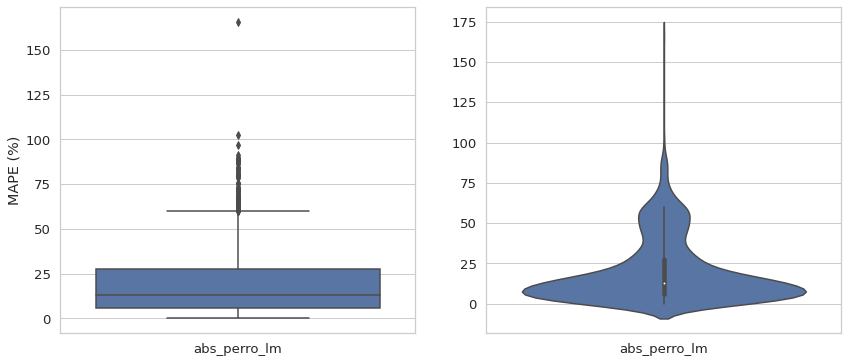

In [58]:
from sklearn.linear_model import LinearRegression

results = dataset.copy()[["preco"]]

lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(X_train, y_train)

results["pred_lm"] = lm_model.predict(X)
results["pred_lm"] = results["pred_lm"].astype(int)
results["erro_lm"] = results.preco - results.pred_lm
results["perror_lm"] = results.erro_lm / results.preco
results["abs_perro_lm"] = 100 * results.perror_lm.abs()

plt.figure();
ax = plt.subplot(121);
sns.boxplot(data=results[["abs_perro_lm"]])
plt.ylabel("MAPE (%)")

ax = plt.subplot(122);
sns.violinplot(data=results[["abs_perro_lm"]])


results[["abs_perro_lm"]].describe()